In [2]:
from skimage.filters import gabor_kernel
from skimage import io
from skimage.transform import resize
from matplotlib import pyplot as plt 
import numpy as np

import math

0.3 0.2 0.0
(3, 3)
0.3 0.8 0.0
(3, 3)
0.3 0.6 0.0
(3, 3)
0.3 0.4 0.0
(3, 3)
0.45 0.2 0.0
(3, 3)
0.45 0.8 0.0
(3, 3)
0.45 0.6 0.0
(3, 3)
0.45 0.4 0.0
(3, 3)
0.6 0.2 0.0
(3, 3)
0.6 0.8 0.0
(3, 3)
0.6 0.6 0.0
(3, 3)
0.6 0.4 0.0
(3, 3)
0.3 0.2 0.196349375
(3, 3)
0.3 0.8 0.196349375
(3, 3)
0.3 0.6 0.196349375
(3, 3)
0.3 0.4 0.196349375
(3, 3)
0.45 0.2 0.196349375
(3, 3)
0.45 0.8 0.196349375
(3, 3)
0.45 0.6 0.196349375
(3, 3)
0.45 0.4 0.196349375
(3, 3)
0.6 0.2 0.196349375
(3, 3)
0.6 0.8 0.196349375
(3, 3)
0.6 0.6 0.196349375
(3, 3)
0.6 0.4 0.196349375
(3, 3)
0.3 0.2 0.39269875
(3, 3)
0.3 0.8 0.39269875
(3, 3)
0.3 0.6 0.39269875
(3, 3)
0.3 0.4 0.39269875
(3, 3)
0.45 0.2 0.39269875
(3, 3)
0.45 0.8 0.39269875
(3, 3)
0.45 0.6 0.39269875
(3, 3)
0.45 0.4 0.39269875
(3, 3)
0.6 0.2 0.39269875
(3, 3)
0.6 0.8 0.39269875
(3, 3)
0.6 0.6 0.39269875
(3, 3)
0.6 0.4 0.39269875
(3, 3)
0.3 0.2 0.5890481249999999
(3, 3)
0.3 0.8 0.5890481249999999
(3, 3)
0.3 0.6 0.5890481249999999
(3, 3)
0.3 0.4 0.589048124999

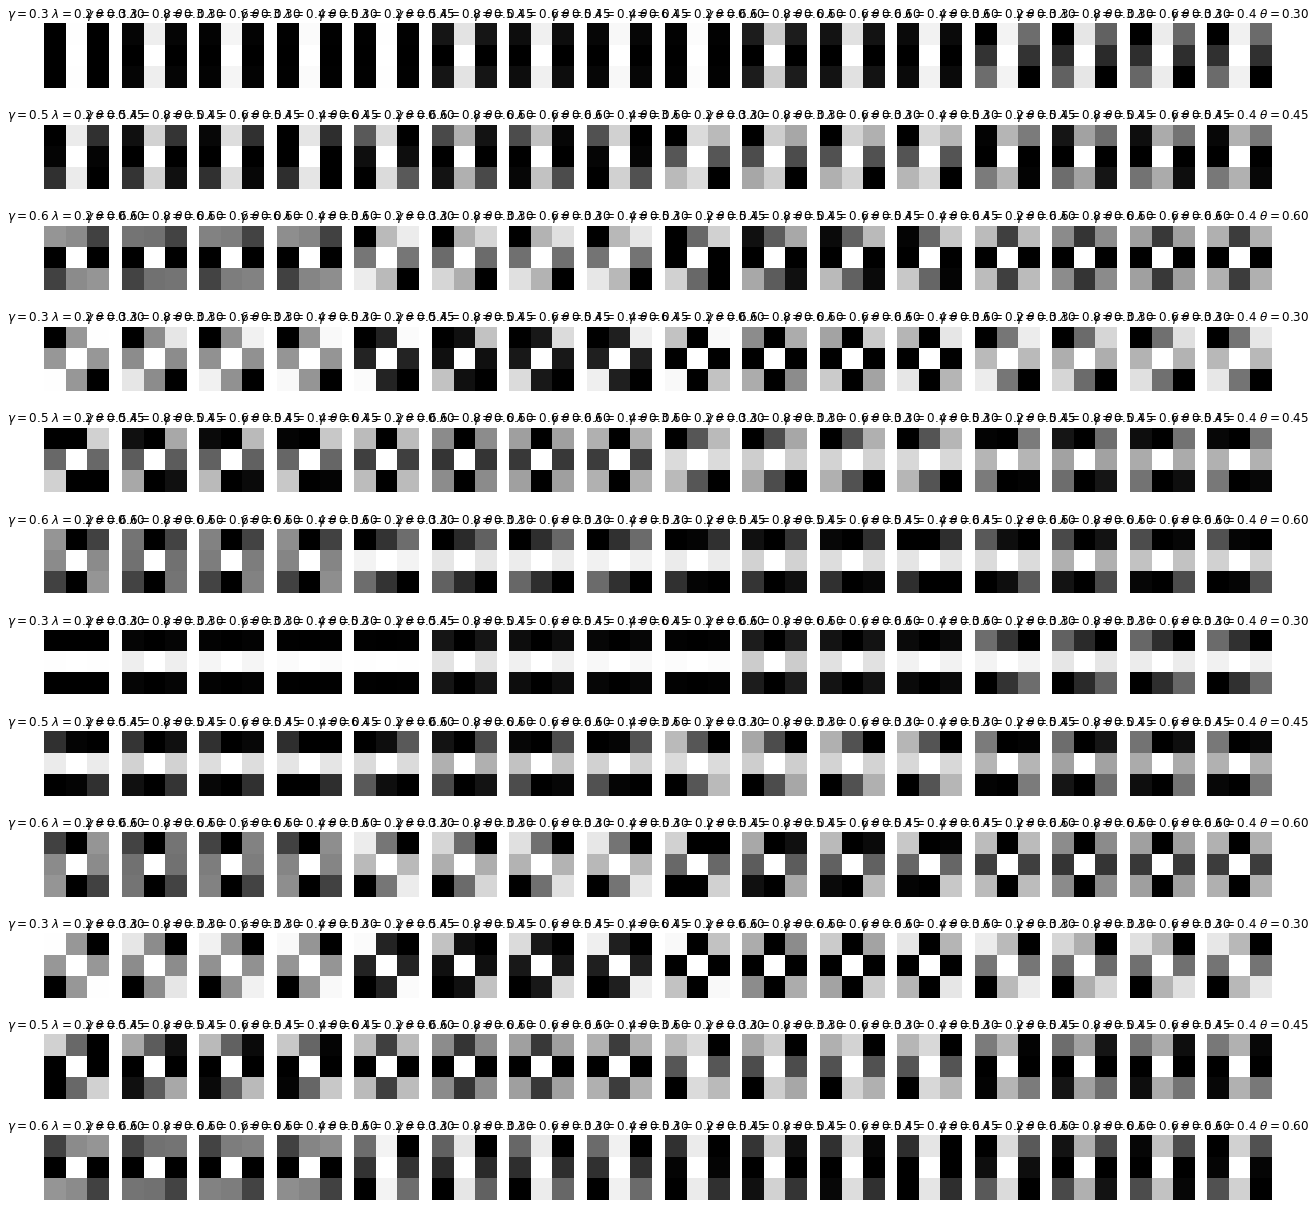

In [3]:
fig = plt.subplots(12, 16, figsize=(22,22))
filterbank = []
cnt = 0
for angle in np.linspace(0.0, 3.14159, 16, endpoint=False):
  for freq in [0.3, 0.45, 0.6]:
    for band in [0.2, 0.8, 0.6, 0.4]:
      print(freq, band, angle)
      cnt = cnt + 1
      gf = gabor_kernel(frequency=freq, bandwidth=band, theta=angle, n_stds=0).real
      plt.subplot(12, 16, cnt)
#       gf = resize(gk.real,(9,9),anti_aliasing=False)
#       gf = gf - np.min(gf)
#       gf = gf/np.max(gf)
#       gf = gf * 0.6
#       gf = gf - 0.3
      filterbank.append(gf)
      plt.imshow(gf, cmap='gray')
      print(gf.real.shape)
      # plt.colorbar()
      plt.axis('off')
      plt.title("$\\gamma=${0:0.1f} $\\lambda=${1:0.1f} $\\theta=${0:0.2f}".format(freq,band,angle))
plt.show()

In [4]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)


x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


In [18]:
# Importing the Keras libraries and packages
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Activation
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop, Adam

input_dim = (32,32,3)
input_img = Input(shape=input_dim)

cl1 = Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same',
             input_shape=input_dim, activation='relu')(input_img)
pl1 = MaxPooling2D(pool_size=(2,2), strides=(2,2))(cl1)

cl2 = Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same',
             activation='relu')(pl1)
pl2 = MaxPooling2D(pool_size=(2,2), strides=(2,2))(cl2)

cl3 = Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same',
             activation='relu')(pl2)
pl3 = MaxPooling2D(pool_size=(2,2), strides=(2,2))(cl3)

cl4 = Conv2D(512, kernel_size=(3,3), strides=(1,1), padding='same',
             activation='relu')(pl3)
pl4 = MaxPooling2D(pool_size=(2,2), strides=(2,2))(cl4)

cl5 = Conv2D(512, kernel_size=(3,3), strides=(1,1), padding='same',
             activation='relu')(pl4)
pl5 = MaxPooling2D(pool_size=(2,2), strides=(2,2))(cl5)

flat = Flatten()(pl5)

fc6 = Dense(units=4096, activation='relu')(flat)
fc7 = Dense(units=4096, activation='relu')(fc6)

output = Dense(units=10, activation='softmax')(fc7)

classifier = Model(input_img, output)

# Compiling the CNN
opt = RMSprop(learning_rate=0.001)
# opt = Adam(learning_rate=0.01)

classifier.compile(optimizer = opt, loss = 'binary_crossentropy', 
                   metrics = ['accuracy'])

print(classifier.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 4, 4, 256)        

In [19]:
np.array(filterbank).shape

(192, 3, 3)

In [20]:
cnnl1 = classifier.layers[1].name   # get the name of the first conv layer
W = classifier.get_layer(name=cnnl1).get_weights()[0]   #get the filters
wshape = W.shape  #save the original shape

In [21]:
wshape

(3, 3, 3, 64)

In [22]:
gabor_filters = np.empty(wshape, dtype='float32')
for kernel_index in range(wshape[3]):
    for channel_index in range(3):
        gabor_filters[:,:,channel_index, kernel_index] = filterbank[kernel_index+channel_index]


In [ ]:
# Fitting the CNN to the images

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10,  
                              min_delta=1e-4, mode='min', verbose=1)

stop_alg = EarlyStopping(monitor='val_loss', patience=35, 
                         restore_best_weights=True, verbose=1)

hist = classifier.fit(x_train, y_train, batch_size=100, epochs=1000, 
                   callbacks=[stop_alg, reduce_lr], shuffle=True, 
                   validation_data=(x_test, y_test))

classifier.save_weights("cnn.hdf5")


Epoch 1/1000
500/500 [==============================] - 958s 2s/step - loss: 0.2972 - accuracy: 0.2386 - val_loss: 0.2365 - val_accuracy: 0.4306
Epoch 2/1000
500/500 [==============================] - 1036s 2s/step - loss: 0.2151 - accuracy: 0.4969 - val_loss: 0.1916 - val_accuracy: 0.5620
Epoch 3/1000
500/500 [==============================] - 949s 2s/step - loss: 0.1732 - accuracy: 0.6180 - val_loss: 0.1540 - val_accuracy: 0.6759
Epoch 4/1000
500/500 [==============================] - 938s 2s/step - loss: 0.1457 - accuracy: 0.6895 - val_loss: 0.1655 - val_accuracy: 0.6567
Epoch 5/1000
500/500 [==============================] - 1024s 2s/step - loss: 0.1250 - accuracy: 0.7378 - val_loss: 0.1523 - val_accuracy: 0.6812
Epoch 6/1000
500/500 [==============================] - 1009s 2s/step - loss: 0.1107 - accuracy: 0.7742 - val_loss: 0.1527 - val_accuracy: 0.6688
Epoch 7/1000
500/500 [==============================] - 966s 2s/step - loss: 0.0986 - accuracy: 0.7992 - val_loss: 0.1476 - val

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], color='#785ef0')
plt.plot(hist.history['val_loss'], color='#dc267f')
plt.title('Model Loss Progress')
plt.ylabel('Binary Cross-Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Test Set'], loc='upper right')
plt.savefig('cnn-gabor.cifar10.loss-2.png', dpi=350, bbox_inches='tight')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

cnnl1 = classifier.layers[1].name   # get the name of the first conv layer
W = classifier.get_layer(name=cnnl1).get_weights()[0]   #get the filters
wshape = W.shape  #save the original shape

# this part will scale to [0, 1] for visualization purposes
scaler = MinMaxScaler()
scaler.fit(W.reshape(-1,1))
W = scaler.transform(W.reshape(-1,1))
W = W.reshape(wshape)

# since there are 64 filters, we will display them 8x8
fig, axs = plt.subplots(8,8, figsize=(24,24))
fig.subplots_adjust(hspace = .25, wspace=.001)
axs = axs.ravel()
for i in range(W.shape[-1]):
  # we reshape to a 3D (RGB) image shape and display
  h = np.reshape(W[:,:,:,i], (3,3,3))
  axs[i].imshow(h)
  axs[i].set_title('Filter ' + str(i))    
plt.savefig("cnn-gabor.full.filters-2.png", bbox_inches='tight', dpi=350)

In [ ]:
cnnl1 = classifier.layers[1].name   # get the name of the first conv layer
W = classifier.get_layer(name=cnnl1).get_weights()[0]
plt.hist(W.ravel(), bins=100)
print(np.min(W),np.max(W))